### DESAFIO REGULARIZACION
#### CAMILA  VERA  - LUNES  19 AGOSTO

### Descripción
* En esta ocasión utilizaremos datos de la composición química de muestras de vino.
* Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
* Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    * Identifique el tipo de datos de cada columna.
    * Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
    * Encuentre la cantidad de valores faltantes en cada columna.
    * Grafique la distribución empírica de cada atributo.

### Ejercicio 1: Preparación del Ambiente de Trabajo
* Importe las librerías básicas
*  Importe los métodos asociados a regularización
* Importe la base de datos

In [37]:
# librerias clasicas
import numpy as np
import pandas as pd
import pandas_profiling

import warnings
warnings.filterwarnings("ignore")

#libreria sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,median_absolute_error
#metodos de regularizacion
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

# librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

import cv_error as gfx

plt.style.use('seaborn') 

In [3]:
#carga dataset
df= pd.read_csv("winequality-red.csv")

In [4]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Ejercicio 2: Análisis exploratorio
* Identifique el tipo de datos de cada columna.
* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos

In [5]:
df.shape

(1599, 12)

#### Tipo de datos de cada columna

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Outliers multivariados

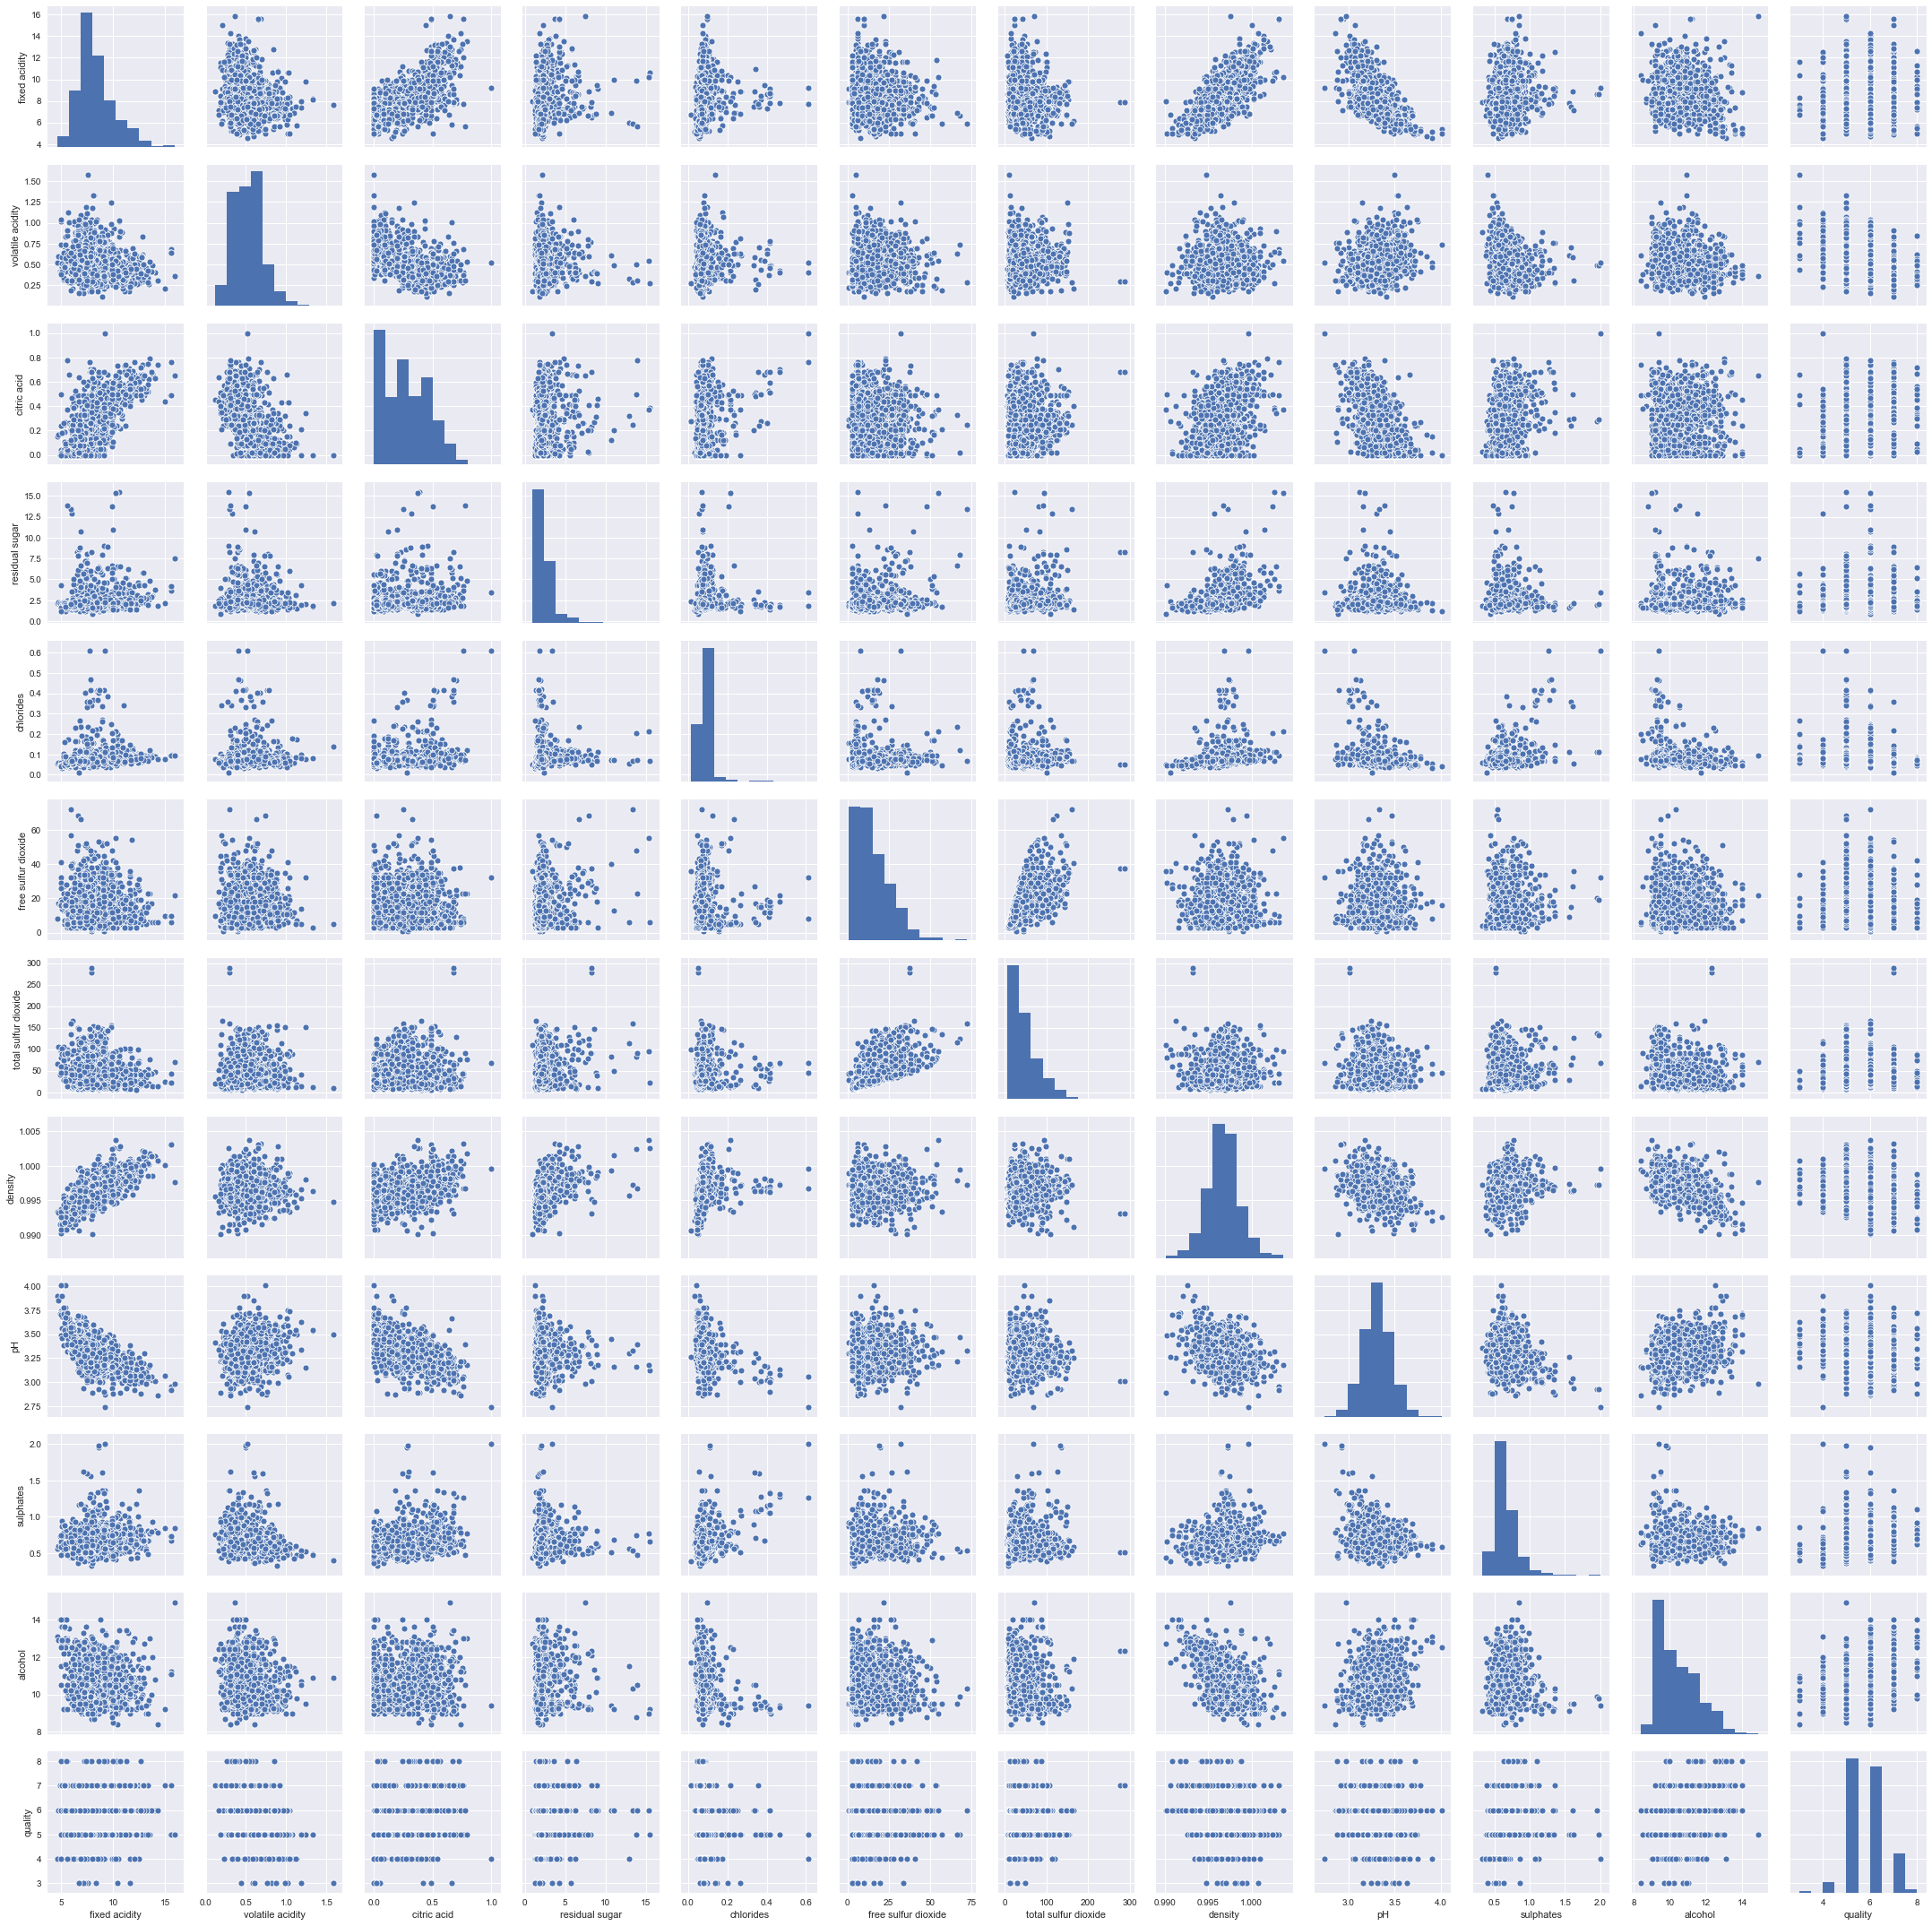

In [9]:
sns.pairplot(df)
sns.set(style="ticks", palette ="pastel")

In [10]:
# correlaciones para observar si existe colinealidad entre los datos de la muestra

df.corr().style.background_gradient(cmap = 'Greens') 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397


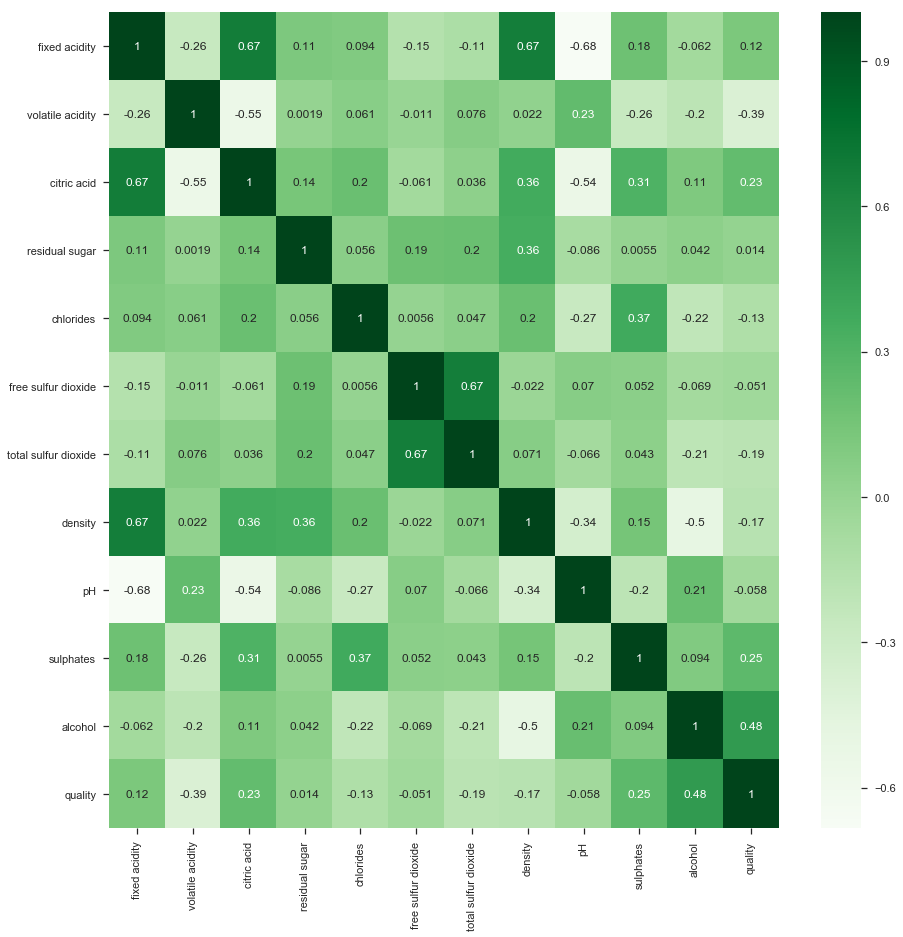

In [11]:
plt.figure(figsize=(15,15)) # aumentamos el tamaño
sns.heatmap(df.corr(), cmap='Greens',annot=True) # mapa de calor de las correlaciones

- Existe correlacion parcial entre las variables.
- Las correlaciones relevantes son entre las variables **fixed acidity**/ **density** y **citric acid**/**fixed acidity**

#### Outliers univariados con boxplot

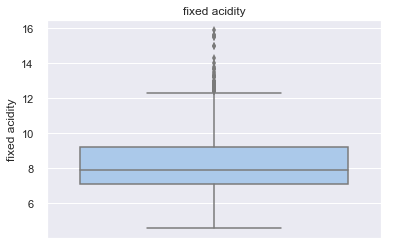

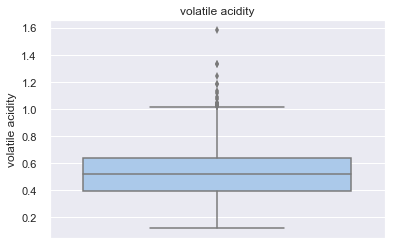

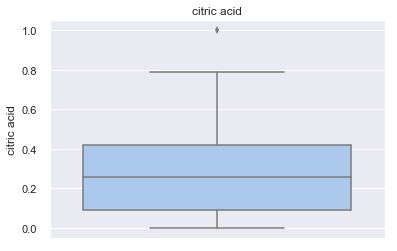

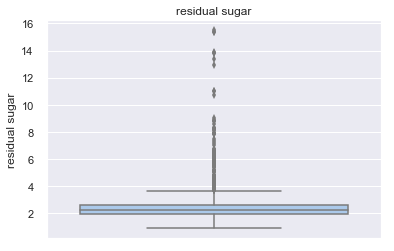

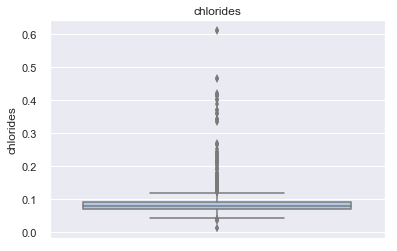

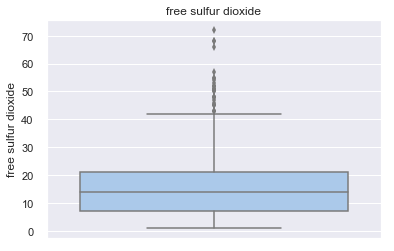

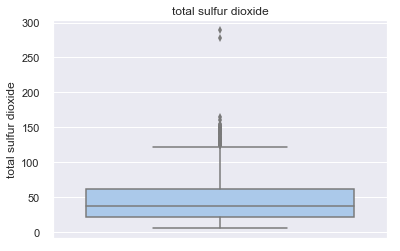

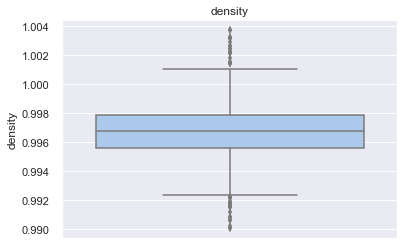

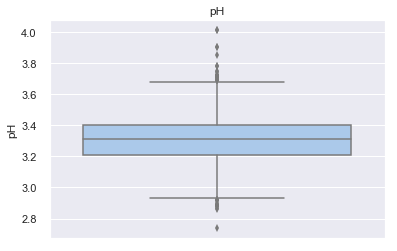

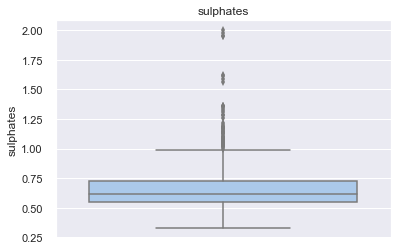

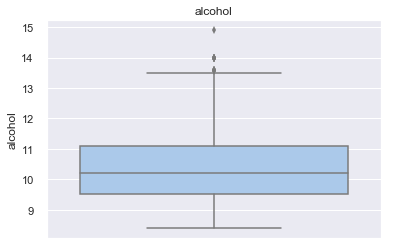

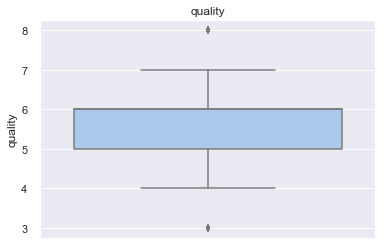

In [12]:
#Boxplot

for i in df.columns:
    plt.figure()
    sns.set(palette = 'pastel')
    sns.boxplot(y=df[i])
    plt.title(i)            


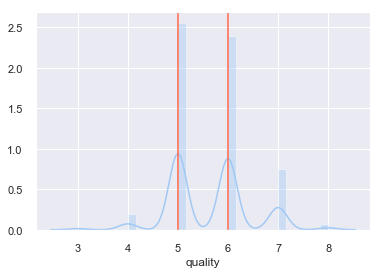

In [13]:
sns.distplot(df['quality'])
plt.axvline(df['quality'].quantile(.25), color = 'tomato')
plt.axvline(df['quality'].quantile(.75), color = 'tomato')

- outliers hacia valores extremos
- 

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

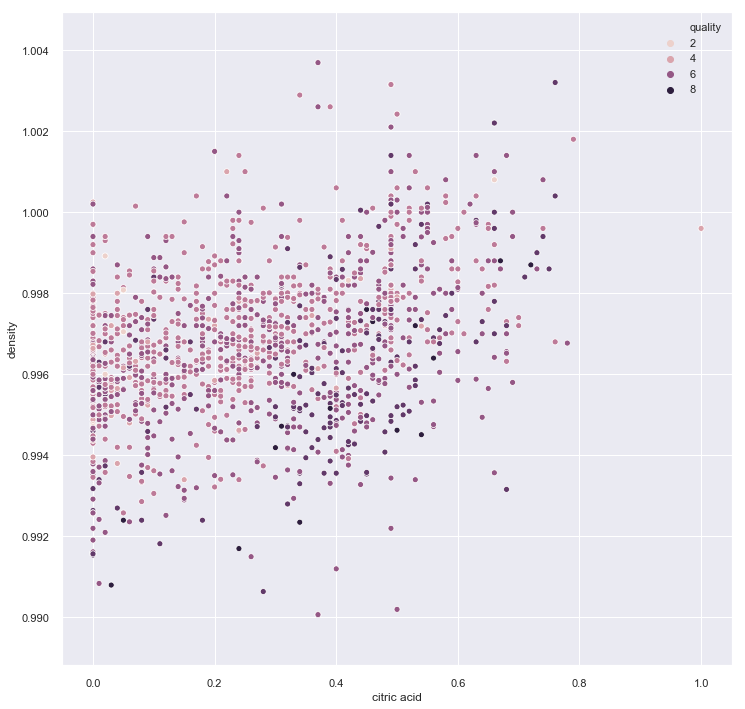

In [15]:
fig , ax = plt.subplots(figsize = (12,12))
sns.scatterplot(data=df, y='density', x='citric acid', hue = 'quality')

### Ejercicio 3: Regularización de modelos
* Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV. 
Para cada uno de ellos implemente los siguientes pasos:
    * Entrene los modelos con 10 validaciones cruzadas.
    * Extraiga los coeficientes estimados, el mejor valor alpha, MAE (median_absolute_error) y RMSE (mean_squared_error) asociado a cada modelo.
* En base a la información solicitada, responda lo siguiente:
    * ¿Qué modelo presenta un mejor desempeño en base a las métricas?
    * ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
#escalamiento de variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['quality'] = np.log(df['quality'])

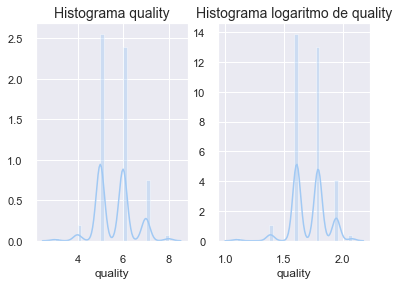

In [18]:
fig , ax = plt.subplots(1,2)
sns.distplot(df['quality'], bins='fd',ax = ax[0])\
.set_title('Histograma quality', size = 14)

sns.distplot(df_scaled['quality'], bins = 'fd', ax = ax[1])\
.set_title('Histograma logaritmo de quality', size = 14);

In [19]:
x = df_scaled.drop('quality', axis = 1) #quitar columna quality
y = df_scaled['quality'] #se asigna como target la variable quality

#division modelo en conjuntos de entrenamiento y validacion
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 25)

### MODELO DE REGULARIZACION RIDGE

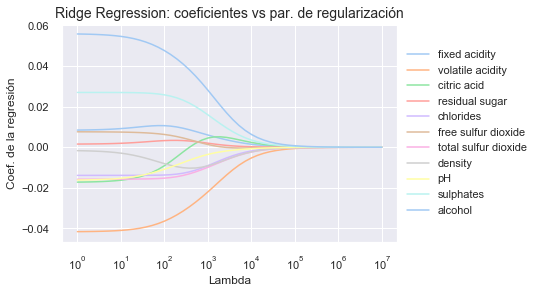

In [20]:
#MODELO DE REGULARIZACION RIDGE
names_regressors = x_train.columns #guarda los nombres de los atributos
alphas = np.logspace(0,7,base = 10) #generacion de un vector con los valores de la norma

coefs_ridge = [] #lista para guardar parametros
cv_err_ridge = [] #lista para guardar parametros
model_ridge = Ridge(fit_intercept = True) #instancia el modelo
tol = 0.1 #tolerancia

# para cada valor en el vector
for a in alphas:
    #estimacion del modelo
    model_ridge.set_params(alpha = a)
    model_ridge.fit(x_train, y_train)
    #guarda el coeficiente estimado
    coefs_ridge.append(model_ridge.coef_)
    #generacion del destimado de validacion cruzada
    dummy,cv_err_estimates = gfx.cv_error(x_train, y_train, k = 10, method = 'ridge', alpha = a)
    #guarda la media del error de cv para cada alpha
    cv_err_ridge.append(np.mean(cv_err_estimates))
    
for y_arr, label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label = label) 
plt.legend()
plt.xscale("log")
plt.title("Ridge Regression: coeficientes vs par. de regularización", size =14)
plt.xlabel('Lambda')
plt.ylabel('Coef. de la regresión')
plt.axis("tight")
plt.legend(loc="center left", bbox_to_anchor=(1, .5));  



#### RIDGE - Comportamiento  del error de validación para cada $\lambda$

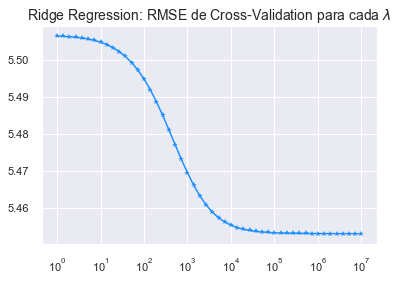

In [21]:
plt.plot(alphas, np.sqrt(cv_err_ridge),"*-", color='dodgerblue')
plt.xscale("log")
plt.title("Ridge Regression: RMSE de Cross-Validation para cada $\lambda$",
fontsize = 14);

In [22]:
alphas_ = np.logspace(0, 7, base = 10)
ridge_cv = RidgeCV(cv = 10)
model_ridge = ridge_cv.fit(x_train, y_train)

#### modelo elige automáticamente el valor de lamda

In [23]:
#El modelo elige automáticamente el valor de lamda
def report_regularization(model, x_test, y_test):
    print('Valor del parámetro de regularización: {0}'.format(model.alpha_))
    print('Coeficientes finales: \n{0}'.format(model.coef_))
    y_hat = model.predict(x_test)
    print('R-squared: {0}'.format(r2_score(y_test,y_hat)))
    print('Mean Squared Error: {0}'.format(mean_squared_error(y_test, y_hat)))

report_regularization(ridge_cv, x_test, y_test)

Valor del parámetro de regularización: 10.0
Coeficientes finales: 
[ 0.00918059 -0.04097191 -0.01624654  0.00194376 -0.01385219  0.00745949
 -0.01572496 -0.00291662 -0.01529599  0.02695098  0.05460065]
R-squared: 0.32654493368007587
Mean Squared Error: 0.013410766430745511


In [24]:
model_ridge.alpha_

10.0

#### Coeficientes estimados Ridge

In [25]:
model_ridge.coef_

array([ 0.00918059, -0.04097191, -0.01624654,  0.00194376, -0.01385219,
        0.00745949, -0.01572496, -0.00291662, -0.01529599,  0.02695098,
        0.05460065])

### MODELO DE REGULARIZACION LASSO

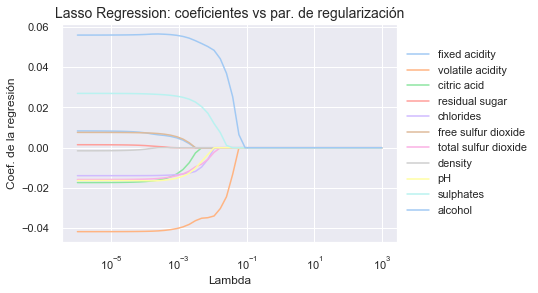

In [26]:
#MODELO DE REGULARIZACION LASSO
names_regressors = x_train.columns #guarda los nombres de los atributos
alphas = np.logspace(-6,3,base = 10) #generacion de un vector con los valores de la norma
#alphas=[0.01,0.1,1,10,100]
coefs_lasso = [] #lista para guardar parametros
cv_err_lasso = [] #lista para guardar parametros
model_lasso = Lasso(fit_intercept = True)

# para cada valor en el vector
for a in alphas:
    #estimacion del modelo
    model_lasso.set_params(alpha = a)
    model_lasso.fit(x_train, y_train)
    #guarda el coeficiente estimado
    coefs_lasso.append(model_lasso.coef_)
    #generacion del destimado de validacion cruzada
    dummy,cv_err_estimates = gfx.cv_error(x_train, y_train, k = 10, method = 'lasso', alpha = a)
    #guarda la media del error de cv para cada alpha
    cv_err_lasso.append(np.mean(cv_err_estimates))
    
for y_arr, label in zip(np.squeeze(coefs_lasso).T, names_regressors):
    plt.plot(alphas, y_arr, label = label) 
plt.legend()
plt.xscale("log")
plt.title("Lasso Regression: coeficientes vs par. de regularización", size =14)

plt.xlabel('Lambda')
plt.ylabel('Coef. de la regresión')

plt.axis("tight")
plt.legend(loc="center left", bbox_to_anchor=(1, .5)); 

#### LASSO  - Comportamiento  del error de validación para cada $\lambda$

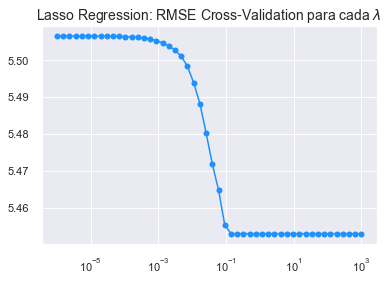

In [27]:
plt.plot(alphas, np.sqrt(cv_err_lasso),'o-',color='dodgerblue')
plt.xscale("log")
plt.title("Lasso Regression: RMSE Cross-Validation para cada $\lambda$",
fontsize = 14);

In [28]:
model_lasso = LassoCV(cv= 10)
model_lasso.fit(x_train, y_train)
report_regularization(model_lasso, x_test, y_test)

Valor del parámetro de regularización: 0.001073960587054361
Coeficientes finales: 
[ 0.00439948 -0.03974432 -0.01201223  0.         -0.01320766  0.00494216
 -0.01347653 -0.         -0.01465279  0.02535277  0.05555979]
R-squared: 0.3303689921186521
Mean Squared Error: 0.013334616503152711


In [29]:
model_lasso.alpha_

0.001073960587054361

#### Coeficientes estimados Lasso

In [30]:
model_lasso.coef_

array([ 0.00439948, -0.03974432, -0.01201223,  0.        , -0.01320766,
        0.00494216, -0.01347653, -0.        , -0.01465279,  0.02535277,
        0.05555979])

### MODELO DE REGULARIZACION ELASTIC NET

In [31]:
model_elastic_net = ElasticNetCV(cv= 10)
model_elastic_net.fit(x_train, y_train)
report_regularization(model_elastic_net, x_test, y_test)

Valor del parámetro de regularización: 0.002147921174108722
Coeficientes finales: 
[ 0.00437147 -0.03967965 -0.01190456  0.         -0.01321142  0.00493581
 -0.01348292 -0.         -0.01459962  0.02533416  0.05548526]
R-squared: 0.33049844760609404
Mean Squared Error: 0.013332038606880063


In [32]:
model_elastic_net.alpha_

0.002147921174108722

#### Coeficientes estimados Elastic Net

In [33]:
model_elastic_net.coef_

array([ 0.00437147, -0.03967965, -0.01190456,  0.        , -0.01321142,
        0.00493581, -0.01348292, -0.        , -0.01459962,  0.02533416,
        0.05548526])

### Comparacion de modelos

,Ridge,Lasso,ElastiNet
R2,0.327,0.330,0.330
RMSE,0.116,0.115,0.115
MAE,0.065,0.067,0.067


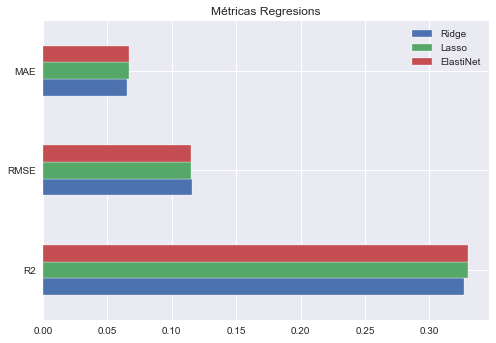

In [40]:
# Se comparan las métricas de cada modelo
data = { 'Ridge': [r2_score(y_test,model_ridge.predict(x_test)).round(3), 
                                    np.sqrt(mean_squared_error(y_test,model_ridge.predict(x_test))).round(3),
                                    median_absolute_error(y_test,model_ridge.predict(x_test)).round(3)],
         'Lasso': [r2_score(y_test,model_lasso.predict(x_test)).round(3), 
                                    np.sqrt(mean_squared_error(y_test,model_lasso.predict(x_test))).round(3),
                                    median_absolute_error(y_test,model_lasso.predict(x_test)).round(3)],
        'ElastiNet': [r2_score(y_test,model_elastic_net.predict(x_test)).round(3), 
                                    np.sqrt(mean_squared_error(y_test,model_elastic_net.predict(x_test))).round(3),
                                    median_absolute_error(y_test,model_elastic_net.predict(x_test)).round(3)]
       }
errors_df = pd.DataFrame(data, index=['R2','RMSE','MAE'])
display(errors_df.head())
display(errors_df.plot(title='Métricas Regresions',kind='barh'))

In [45]:
data = { 'ridge': model_ridge.coef_, 'lasso': model_lasso.coef_, 'elastic': model_elastic_net.coef_ }
coefs_data = pd.DataFrame(data, index=x.columns)
coefs_data

,ridge,lasso,elastic
fixed acidity,0.009181,0.004399,0.004371
volatile acidity,-0.040972,-0.039744,-0.039680
citric acid,-0.016247,-0.012012,-0.011905
residual sugar,0.001944,0.000000,0.000000
chlorides,-0.013852,-0.013208,-0.013211
free sulfur dioxide,0.007459,0.004942,0.004936
total sulfur dioxide,-0.015725,-0.013477,-0.013483
density,-0.002917,-0.000000,-0.000000
pH,-0.015296,-0.014653,-0.014600
sulphates,0.026951,0.025353,0.025334


La comparacion de los 3 modelos indican que no hay mayores diferencias entre los R2 Y los erroes de la media y error absoluto. La diferencia se puede notar en los lamda y en las penalizaciones. En el caso de lasso y elastic-net se eliminan las variables 'density' del modelo. El lamda de Ridge corresponde a 10, el de Lasso a 0.001 y ElasticNet es a 0.002.

Los graficos muestran como las variables influencian a la variable objetivo "quality" , por ejemplo, los sulfatos y el alcohol tienden a incrementar sutilmente las condiciones de calidad, por el contrario la volatilidad y acidez tienden a disminuir el factor calidad del vino.

                                ***